<a href="https://colab.research.google.com/github/Ronaldodev1982/Ronaldodev1982/blob/main/Calculo_de_Metrica_Avaliacao_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install scikit-plot

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import scikitplot as skplt
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

In [4]:
tf.__version__

'2.12.0'

In [5]:
logdir='log'

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.1483 - accuracy: 0.9535 - val_loss: 0.0450 - val_accuracy: 0.9848
Epoch 2/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0440 - accuracy: 0.9864 - val_loss: 0.0354 - val_accuracy: 0.9884
Epoch 3/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0325 - accuracy: 0.9899 - val_loss: 0.0292 - val_accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0244 - accuracy: 0.9919 - val_loss: 0.0309 - val_accuracy: 0.9905
Epoch 5/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.0269 - val_accuracy: 0.9916


In [10]:
y_true=test_labels

y_pred=model.predict(test_images)
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 4s 12ms/step


In [11]:
classes=[0,1,2,3,4,5,6,7,8,9]

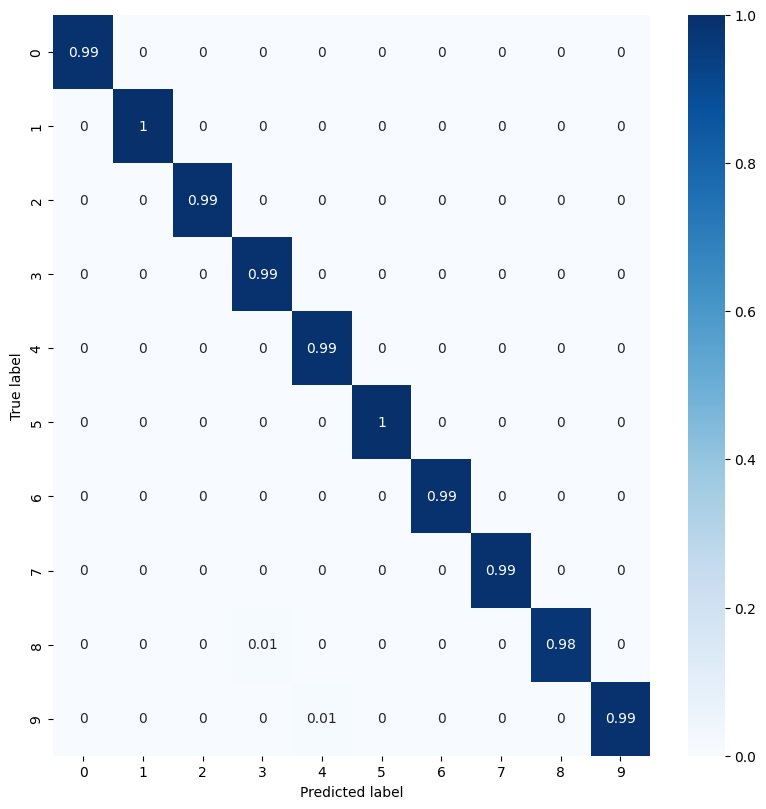

In [12]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [13]:
FP = con_mat.sum(axis=0) - np.diag(con_mat)
FN = con_mat.sum(axis=1) - np.diag(con_mat)
VP = np.diag(con_mat)
VN = con_mat.sum() - (FP + FN + VP)
total_itens = 10000

In [14]:
acuracia =  (VP + VN)/(FP + FN + VP + VN)
sensibilidade = VP/(VP+FN)
especificidade = VN/(VN+FP)
precisao = VP/(VP+FP)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)
roc_auc_score

<function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>

In [15]:
print("Verdadeiros Positivos: ", VP)
print("\nFalsos Positivos: ", FP)
print("\nVerdadeiros Negativos: ", VN)
print("\nFalsos Negativos: ", FN)

Verdadeiros Positivos:  [ 974 1131 1023 1004  975  888  946 1018  959  998]

Falsos Positivos:  [ 4 10  7 17  9 14  4  7  3  9]

Verdadeiros Negativos:  [9016 8855 8961 8973 9009 9094 9038 8965 9023 8982]

Falsos Negativos:  [ 6  4  9  6  7  4 12 10 15 11]


In [16]:
print ("\nAcuracia: ", acuracia)
print ("\nSensibilidade: ", sensibilidade)
print ("\nEspecificidade: ", especificidade)
print ("\nPrecisão: ", precisao)
print ("\nf_score: ", f_score)


Acuracia:  [0.999  0.9986 0.9984 0.9977 0.9984 0.9982 0.9984 0.9983 0.9982 0.998 ]

Sensibilidade:  [0.99387755 0.99647577 0.99127907 0.99405941 0.99287169 0.9955157
 0.9874739  0.99027237 0.98459959 0.98909812]

Especificidade:  [0.99955654 0.99887197 0.99921945 0.99810901 0.999002   0.99846289
 0.99955762 0.99921979 0.99966763 0.998999  ]

Precisão:  [0.99591002 0.99123576 0.99320388 0.98334966 0.99085366 0.98447894
 0.99578947 0.99317073 0.9968815  0.99106256]

f_score:  [0.99489275 0.99384886 0.99224054 0.98867553 0.99186165 0.98996656
 0.99161426 0.99171943 0.99070248 0.99007937]


In [17]:
def plot_roc_curve(sensibilidade, especificidade):
    plt.plot(sensibilidade, especificidade, color='blue', label='ROC')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.show()

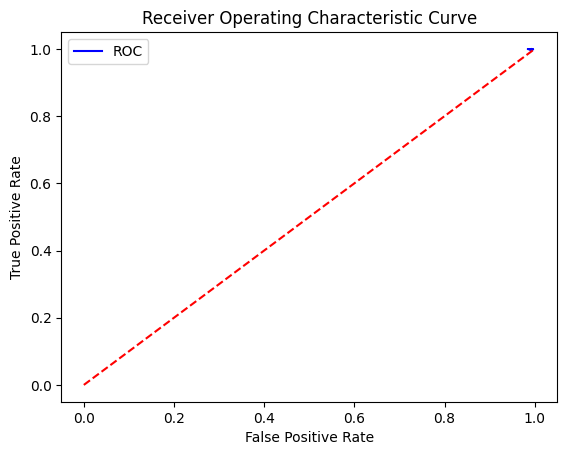

In [18]:
plot_roc_curve(sensibilidade,especificidade)